In [1]:
#to load gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install ultralytics
!pip install easyocr
!pip install lapx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.0/608.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.1 MB/s eta 0:00:00


In [41]:
import cv2
from google.colab import files

import numpy as np

def process_image(image, output_width=800):

    # Read the image
    #image = cv2.imread(img)

    # Resize the image to the specified width (keeping the aspect ratio)
    aspect_ratio = output_width / image.shape[1]
    output_height = int(image.shape[0] * aspect_ratio)
    resized_image = cv2.resize(image, (output_width, output_height))

    # Convert the image to grayscale
    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Apply noise reduction using Gaussian blur
    blurred_image = cv2.GaussianBlur(grayscale_image, (3, 3), 0)

    # Apply a sharpening kernel to enhance edges and details
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])
    #to sharpen the image
    sharpened_image = cv2.filter2D(image, -1, kernel)

    # Enhance contrast
    enhanced_image = cv2.convertScaleAbs(sharpened_image, alpha=1.5, beta=0)
    return enhanced_image


In [45]:
import cv2
import os
import easyocr
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

def OCR_yolo(frame):
    # Load the YOLOv8 model
    model = YOLO('/content/gdrive/MyDrive/ITS_Angled/Number_plate_recognition/data/runs/detect/train2/weights/best.pt')
    #frame = cv2.imread('/content/gdrive/MyDrive/ITS_Angled/OCR/OIP.jpg') #load image
    results = model.track(frame, persist=True,conf=0.5)
    boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
    ids = results[0].boxes.id.cpu().numpy().astype(int)
    arr =[]  #to store licence plate number
    for box, id in zip(boxes, ids):
        cropped_img = frame[box[1]:box[3], box[0]:box[2]]

        #processing cropped image
        #processed_image = process_image(cropped_img)

        #applying OCR
        reader = easyocr.Reader(['en'])
        result = reader.readtext(cropped_img)
        arr.append(result[0][-2])
    return arr

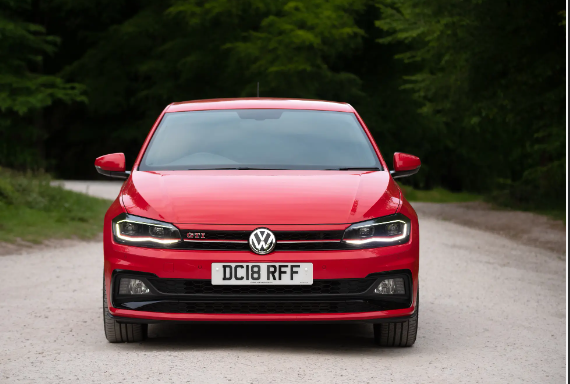


0: 448x640 1 licence, 28.4ms
Speed: 1.9ms preprocess, 28.4ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


['IcIB RFF']

In [49]:
frame = cv2.imread('/content/gdrive/MyDrive/ITS_Angled/Number_plate_recognition/data/images_to_try/car4.png')
cv2_imshow(frame)
arr = []
arr = OCR_yolo(frame)
arr

rough

(13, 49, 3)


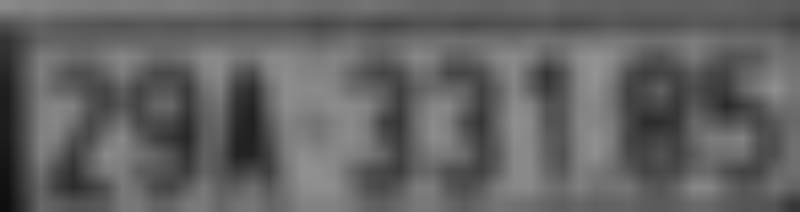

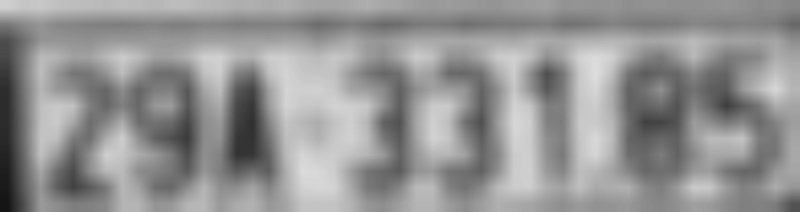

In [20]:
import cv2
from google.colab import files
import io
import numpy as np



def process_image(img, output_width=800):

    # Read the image
    image = cv2.imread(img)

    # Resize the image to the specified width (keeping the aspect ratio)
    print( image.shape)
    aspect_ratio = output_width / image.shape[1]
    output_height = int(image.shape[0] * aspect_ratio)
    resized_image = cv2.resize(image, (output_width, output_height))

    # Convert the image to grayscale
    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Apply noise reduction using Gaussian blur
    blurred_image = cv2.GaussianBlur(grayscale_image, (3, 3), 0)

    # Enhance contrast
    enhanced_image = cv2.convertScaleAbs(blurred_image, alpha=1.5, beta=0)

    # Display the original and processed images
    cv2_imshow(resized_image)
    cv2_imshow(enhanced_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage:
# Provide the path to the uploaded file in Google Colab
img = '/content/gdrive/MyDrive/ITS_Angled/Number_plate_recognition/data/images_to_try/bike_croped.jpg'
process_image(img)


In [21]:
import cv2
import numpy as np
from google.colab import files

def sharpen_image(image):
    # Apply a sharpening kernel to enhance edges and details
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image

def deblur_image(image, kernel_size=(5, 5)):
    # Apply inverse filtering for deblurring
    kernel = np.ones(kernel_size) / np.prod(kernel_size)
    deblurred_image = cv2.filter2D(image, -1, kernel)
    return deblurred_image

def enhance_contrast(image):
    # Apply contrast enhancement using histogram equalization
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(image)
    return enhanced_image


img = '/content/gdrive/MyDrive/ITS_Angled/Number_plate_recognition/data/images_to_try/bike_croped.jpg'
original_image = cv2.imread(img)
license_plate_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Enhance the image
sharpened_image = sharpen_image(license_plate_image)
deblurred_image = deblur_image(license_plate_image)
enhanced_image = enhance_contrast(license_plate_image)
better_image = enhance_contrast(sharpened_image)


# Display the original and enhanced images
cv2_imshow( license_plate_image)  #'Original Image'
cv2_imshow( sharpened_image) #'Sharpened Image',
cv2_imshow( deblurred_image) #'Deblurred Image',
cv2_imshow( enhanced_image) #'Enhanced Image',
cv2_imshow( better_image) #'Enhanced Image',
cv2.waitKey(0)
cv2.destroyAllWindows()
